<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [184]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.integrate as inte

from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

In [236]:
r = 0.9
def f(x):
    if -0.5 <= x <= 0.5:
        return 1
    else:
        return 0

def g(x, c=0):
    if c - r <= x <= c + r:
        return np.sqrt(r ** 2 - (x - c) ** 2)
    else:
        return 0

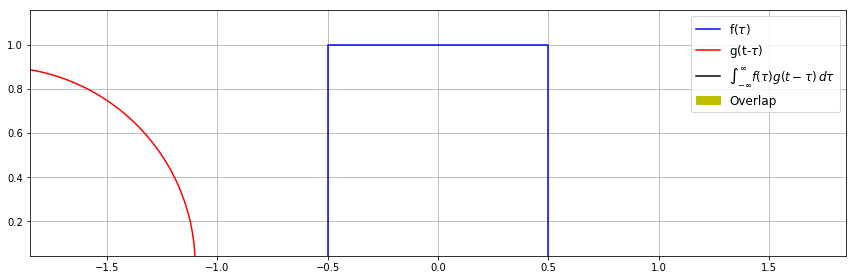

In [241]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
fig.set_facecolor("white")
ax.plot([-0.5, -0.5, 0.5, 0.5], [0, 1, 1, 0], "b")
ax.grid()
ax.axis("equal")
ax.axis([-2, 2, 0, 1.2])
theta = np.linspace(0, np.pi, 360)
x = r * np.cos(theta) - 2
y = r * np.sin(theta)
pts, = ax.plot(x, y, "r")
select = np.logical_and(x >= -0.5, x <= 0.5)
xs, ys = x[select], y[select]
filled = ax.fill_between(xs, ys, zorder=2, color="y")
# integrate
int_val = inte.quad(lambda x: f(x) * g(x, -2), -0.5, 0.5)[0]
curve_x, curve_y = [-2], [int_val]
line = ax.plot(curve_x, curve_y, "k")
plt.legend([r"f($$ \tau $$)", r"g(t-$$ \tau $$)", r"$$ \int_{-\infty}^{\infty}f(\tau)g(t-\tau)\,d\tau $$", 
            "Overlap"], prop={'size': 12}, loc=1)
plt.tight_layout()

def init():
    pass

def anim_func(frame):
    if frame > 0:
        xx = x + frame
        pts.set_data(xx, y)
        
        curve_x.append(frame - 2)
        curve_y.append(inte.quad(lambda x: f(x) * g(x, frame - 2), -0.5, 0.5)[0])
        line[0].set_data(curve_x, curve_y)
        
        select = np.logical_and(xx >= -0.5, xx <= 0.5)
        xs, ys = xx[select], y[select]
        if xs.shape[0] > 0:
            fx = np.concatenate((xs, [xs.min(), xs.max()]))
            fy = np.concatenate((ys, [0, 0]))
            filled.set_paths([np.stack((fx, fy), axis=-1)])
        else:
            filled.set_paths([np.zeros((0, 2))])

anim = animation.FuncAnimation(fig, anim_func,
                               init_func=init,
                               frames=np.linspace(0, 5, 101), interval=50)

In [242]:
anim